In [13]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

    100% |████████████████████████████████| 286kB 2.6MB/s ta 0:00:01


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("../data/booking_train_set.csv", nrows=999999)

In [2]:
df

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1
...,...,...,...,...,...,...,...,...,...,...
999994,999994,38375,2016-08-11,2016-08-12,31870,desktop,2436,Gondal,Fook Island,38375_1
999995,999995,3849877,2016-01-14,2016-01-17,48968,mobile,359,Tcherkistan,Cobra Island,3849877_1
999996,999996,3849877,2016-01-17,2016-01-19,23921,mobile,9452,Tcherkistan,Cobra Island,3849877_1
999997,999997,3849877,2016-01-19,2016-01-22,29319,mobile,359,Tcherkistan,Cobra Island,3849877_1


In [3]:
from collections import Counter

def plot_count(data,  title="", counted=False):
    
    plt.style.use("seaborn")
    
    if not counted:
        counter = Counter(data)
    else:
        counter = data
    
    fig, ax = plt.subplots()
    size = 10
    most_common = counter.most_common(20)
    
    for i, l in enumerate(most_common):
        rects1 = ax.bar(size * i, l[1], size / 1.5, label=str(l[0]))
    
    labels = [most_common[i][0] for i in range(len(most_common))]
    ticks = [size * i for i in range(len(most_common))]
    ax.set_title(title)
    plt.xticks(ticks, labels, rotation="vertical", fontsize=10)

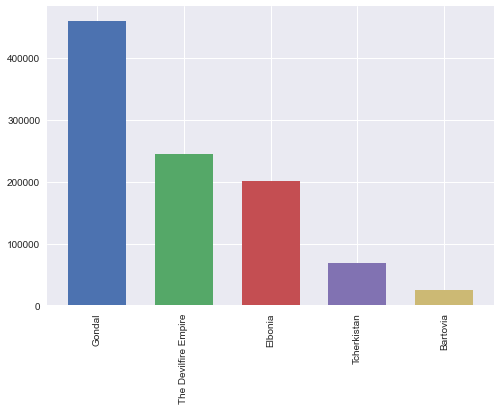

In [4]:
plot_count(df["booker_country"].values)

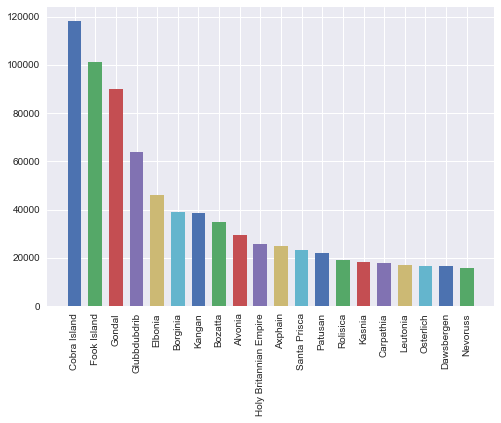

In [5]:
plot_count(df["hotel_country"].values)

In [6]:
df = pd.read_csv("../data/booking_train_set.csv", nrows=999999)
per_trip = df.groupby(df.utrip_id).\
    agg({"city_id": "unique", "user_id": "count", "hotel_country": "unique"})

per_trip

,city_id,user_id,hotel_country
utrip_id,,,
1000027_1,"[8183, 15626, 60902, 30628]",4,[Gondal]
1000045_1,"[64876, 55128, 9608, 31817, 36170, 58178, 36063]",7,"[Fook Island, Carpathia, Gondal]"
1000083_1,"[55990, 14705, 35160, 36063]",4,"[Osterlich, Gondal]"
100008_1,"[11306, 12096, 6761, 6779, 65690]",5,[Kamistan]
1000097_1,"[17127, 31088, 40521, 55128, 21033, 6306, 6788...",10,[Fook Island]
...,...,...,...
999735_1,"[36063, 43306, 11481, 15626]",5,"[Gondal, Carpathia]"
999776_1,"[17775, 66634]",4,[Novistrana]
999839_1,"[8335, 21328, 48968]",4,[Cobra Island]


In [7]:
df = pd.read_csv("../data/booking_train_set.csv", nrows=999999)
per_trip = df.groupby(df.utrip_id).\
    agg({"city_id": "unique", "user_id": "count", "hotel_country": "unique"})

per_trip["nb_countries"] = per_trip["hotel_country"].apply(len)
per_trip["nb_cities"] = per_trip["city_id"].apply(len)


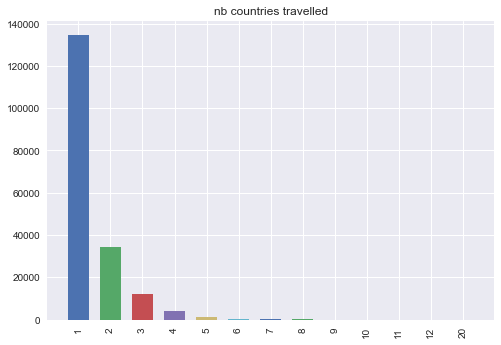

In [8]:
plot_count(per_trip["nb_countries"].values, "nb countries travelled")

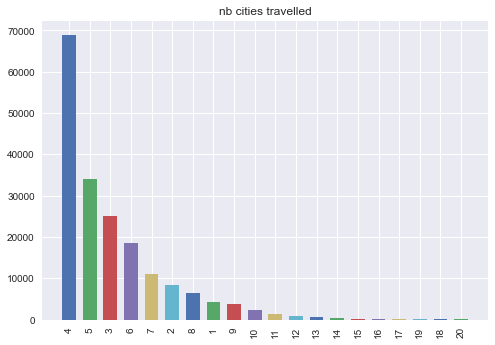

In [9]:
plot_count(per_trip["nb_cities"].values, "nb cities travelled")

In [30]:
# 2 - MF

In [212]:
co_cities = per_trip.city_id.values
co_cities

array([array([ 8183, 15626, 60902, 30628]),
       array([64876, 55128,  9608, 31817, 36170, 58178, 36063]),
       array([55990, 14705, 35160, 36063]), ...,
       array([ 8335, 21328, 48968]), array([51291, 66969, 67169, 24036]),
       array([17944, 47075,   228, 62930])], dtype=object)

In [20]:
list(rez)[:10]

[(8183, 15626),
 (8183, 60902),
 (8183, 30628),
 (15626, 60902),
 (15626, 30628),
 (60902, 30628),
 (64876, 55128),
 (64876, 9608),
 (64876, 31817),
 (64876, 36170)]

In [216]:
arr = np.array(list(rez))
arr

array([[ 8183, 15626],
       [ 8183, 60902],
       [ 8183, 30628],
       ...,
       [47075,   228],
       [47075, 62930],
       [  228, 62930]])

In [217]:
arr.shape

(2063461, 2)

In [25]:
!pip install torch
!pip install torchvision
!pip install pytorch_lightning
!pip install pytorch-lightning-bolts

    100% |████████████████████████████████| 12.8MB 142kB/s eta 0:00:01 8% |██▋                             | 1.0MB 4.0MB/s eta 0:00:03


In [102]:
import os

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import MNIST
from torchvision import transforms
import pytorch_lightning as pl
from pytorch_lightning.metrics.functional import accuracy
from pl_bolts.datasets import DummyDataset, RandomDataset

In [27]:
train = DummyDataset((1, 2), (1,))
train = DataLoader(train, batch_size=32)

In [486]:
class MatrixFactorization(pl.LightningModule):

    def __init__(self, n_items, embedding_size=10):
        super().__init__()
        self.embeddings = nn.Embedding(n_items, embedding_size)
        self.sim = nn.CosineSimilarity(dim=1, eps=1e-6)
        
    def forward(self, x):
        u = self.embeddings(x[:, 0])
        v = self.embeddings(x[:, 1])
        x_hat = self.sim(u, v)
        return x_hat

    def training_step(self, batch, batch_idx):
        x, y = batch
        x_hat = self.forward(x)
        y_prime = torch.where(y > 0, torch.ones_like(y), torch.zeros_like(y)).to(torch.float32)
        loss = F.mse_loss(x_hat, y_prime)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        # --------------------------
        # REPLACE WITH YOUR OWN
        x, y = batch
        x_hat = self.forward(x)
        y_prime = torch.where(y > 0, torch.ones_like(y), torch.zeros_like(y))
        loss = F.mse_loss(x_hat, y_prime)
        self.log('val_loss', loss)
        # --------------------------

    def test_step(self, batch, batch_idx):
        # --------------------------
        # REPLACE WITH YOUR OWN
        x, y = batch
        x_hat = self.forward(x)
        y_prime = torch.where(y > 0, torch.ones_like(y), torch.zeros_like(y))
        loss = F.mse_loss(x_hat, y_prime)
        self.log('test_loss', loss)
        # --------------------------

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.embeddings.parameters(), lr=1e-3, weight_decay=1e-5)
        return optimizer

In [487]:
mf_alg = MatrixFactorization(10, 5)

In [488]:
import numpy as np
mf_alg.forward(
    torch.LongTensor(np.array([[1, 2], [1, 3]]))
)

tensor([0.2624, 0.4269], grad_fn=<DivBackward0>)

In [489]:
e = nn.Embedding(10, 5)
e

Embedding(10, 5)

In [490]:
(e(torch.LongTensor([9, 8])) * (e(torch.LongTensor([8, 7])))).sum(dim=1)

tensor([6.0295, 3.8668], grad_fn=<SumBackward1>)

In [491]:
list(e.parameters())[0].dtype

torch.float32

In [492]:
batch = (torch.LongTensor([[9, 8], [1, 8]]), torch.LongTensor([2, 3]))

mf_alg.training_step(batch, 0)

tensor(1.4273, grad_fn=<MseLossBackward>)

In [493]:
from torch.utils.data import Dataset, TensorDataset

class CustomTensorDataset(Dataset):
    """TensorDataset with support of transforms.
    """
    def __init__(self, tensors, transform=None):
        assert all(tensors[0].size(0) == tensor.size(0) for tensor in tensors)
        self.tensors = tensors
        self.transform = transform

    def __getitem__(self, index):
        x = self.tensors[0][index]

        if self.transform:
            x = self.transform(x)

        y = self.tensors[1][index]

        return x, y

    def __len__(self):
        return self.tensors[0].size(0)

class DummyRecoDs(CustomTensorDataset):
    
    def __init__(self, n_classes=10, n_samples=1000):
        X_train = torch.randint(n_classes, (n_samples, 2))
        y_train = torch.randint(n_classes, (n_samples, 1))
        super().__init__(tensors=(X_train, y_train))


In [494]:
ds = DummyRecoDs(100, 22000)

In [495]:
dl = DataLoader(ds, batch_size=32)

In [496]:
# init model
mf = MatrixFactorization(100)

# Initialize a trainer
trainer = pl.Trainer(max_epochs=3, progress_bar_refresh_rate=20)

# Train the model ⚡
trainer.fit(mf, dl)

GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name       | Type             | Params
------------------------------------------------
0 | embeddings | Embedding        | 1.0 K 
1 | sim        | CosineSimilarity | 0     
------------------------------------------------
1.0 K     Trainable params
0         Non-trainable params
1.0 K     Total params


/home/amor/Documents/code_dw/booking_challenge/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
/home/amor/Documents/code_dw/booking_challenge/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


1

In [510]:
import itertools
import pandas as pd

class Dataset(torch.utils.data.Dataset):
    def __init__(self, a, b):
        assert len(a)==len(b)
        self.a = a
        self.b = b
        
    def __len__(self):
        return len(self.a)
        
    def __getitem__(self, i):
        return self.a[i], self.b[i]

class BookingTripRecoDataModule(pl.LightningDataModule):

    def __init__(self, data_dir: str, batch_size: int):
        super().__init__()
        self.data_dir = data_dir
        self.batch_size = batch_size

    def setup(self, stage=None):
        """
        We use pandas to store the data 
        
        1 - We extract te positive pair of co-occurance of cities among user trips
        2 - Based on the pos pairs, we generate negative example with a neg to pos ratio = 5
        3 - We format this to Nx2 and Nx1 vectors
        """
        df = pd.read_csv(os.path.join(self.data_dir, "booking_train_set.csv"), nrows=999999)
        
        # Some indexes may be missing, we need to reindex
        self.nb_cities = len(set(df.city_id))
        self.index_to_cities = dict(enumerate(set(df.city_id)))
        self.cities_to_index = {v: k for k, v in self.index_to_cities.items()}
        
        # Now we do a split of the training set based user_ids
        users = set(df.user_id.values)
        nb_users = len(users)
        train_nb_users =  int(0.9 * nb_users)
        print(f"Picking {train_nb_users} out of {nb_users}")
        train_users = np.random.choice(np.array(list(users)).flatten(), train_nb_users, replace=False)
        valid_users = users.difference(set(train_users))
        
        # Next we emit positive coocuring pairs
        def from_user_list_to_cooc_pairs(sub_df):
            per_trip = df.groupby(df.utrip_id).\
                agg({"city_id": "unique", "user_id": "count", "hotel_country": "unique"})

            per_trip["nb_countries"] = per_trip["hotel_country"].apply(len)
            per_trip["nb_cities"] = per_trip["city_id"].apply(len)

            def emit_pairs(cities):
                sorted_cities = sorted(map(lambda x: self.cities_to_index[x], cities))
                for i in range(len(cities)):
                    for j in range(i + 1, len(cities)):
                        yield (sorted_cities[i], sorted_cities[j])

            return list(itertools.chain.from_iterable(map(emit_pairs, co_cities)))
        
        self.train_set_pairs = list(from_user_list_to_cooc_pairs(df[df.user_id.isin(train_users)]))
        self.valid_set_pairs = list(from_user_list_to_cooc_pairs(df[df.user_id.isin(valid_users)]))
    
    def build_neg_pairs(self, pos_pairs, n_classes, neg_rate=5):
        
        pair_counter = Counter(pos_pairs)
        pos_pairs_set = set(pos_pairs)
        total_pos_pairs = len(pos_pairs)
        
        print("Total pos pairs : ", total_pos_pairs)
        
        def sample_neg_pair():
            i = None
            j = None
            while i is None or j is None or (i, j) in pos_pairs_set or (j, i) in pos_pairs_set:
                i = np.random.randint(n_classes)
                j = np.random.randint(n_classes)
            return (i, j)
        
        neg_pairs = [sample_neg_pair() for _ in range(neg_rate * total_pos_pairs)]
        
        print("---> ", np.array(pos_pairs).shape, len(pos_pairs))
        
        xs, ys = zip(*pair_counter.items())
        
        X_pos = np.array(xs).reshape((-1, 2))
        Y_pos = np.array(ys)
        
        X_neg = np.array(neg_pairs).reshape((-1, 2))
        Y_neg = np.zeros((X_neg.shape[0]))
        
        X = np.concatenate([X_pos, X_neg], axis=0)
        Y = np.concatenate([Y_pos, Y_neg])
        print(X.shape, Y.shape)
        return X, Y
        
    def train_dataloader(self):
        print(self.train_set_pairs[:10])
        X, Y = self.build_neg_pairs(self.train_set_pairs, self.nb_cities)
        return DataLoader(Dataset(X, Y), batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        X, Y = self.build_neg_pairs(self.valid_set_pairs, self.nb_cities)
        return DataLoader(Dataset(X, Y), batch_size=self.batch_size, shuffle=True)
    
    def test_dataloader(self):
        return self.val_dataloader()

    

In [498]:
pos_pairs = [(1, 1)]
n_classes = 10

def sample_neg_pair():
    i = None
    j = None
    while i is None or j is None or (i, j) in pos_pairs or (j, i) in pos_pairs:
        i = np.random.randint(n_classes)
        j = np.random.randint(n_classes)
    return (i, j)

neg_pairs = np.array([sample_neg_pair() for _ in range(10)]).reshape((-1, 2))
neg_pairs.shape

(10, 2)

In [499]:
dataset = BookingTripRecoDataModule("/home/amor/Documents/code_dw/booking_challenge/data", 256)

In [500]:
dataset.setup()


Picking 155979 out of 173311


In [501]:
X, Y = dataset.build_neg_pairs(dataset.train_set_pairs, dataset.nb_cities)

Total pos pairs :  2063461
--->  (2063461, 2) 2063461
(10951088, 2) (10951088,)


In [502]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, a, b):
        assert len(a)==len(b)
        self.a = a
        self.b = b
        
    def __len__(self):
        return self.a.shape[0]
        
    def __getitem__(self, i):
        return self.a[i], self.b[i]

dl = DataLoader(Dataset(X, Y), batch_size=dataset.batch_size)

In [503]:
dl.dataset[0]

(array([4655, 8788]), 2.0)

In [504]:
# init model
mf = MatrixFactorization(dataset.nb_cities)

# Initialize a trainer
trainer = pl.Trainer(max_epochs=3, progress_bar_refresh_rate=20, check_val_every_n_epoch=1)

# Train the model ⚡
trainer.fit(mf, dl)

GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name       | Type             | Params
------------------------------------------------
0 | embeddings | Embedding        | 380 K 
1 | sim        | CosineSimilarity | 0     
------------------------------------------------
380 K     Trainable params
0         Non-trainable params
380 K     Total params


1

In [515]:
trainer.save_checkpoint("example.ckpt")
new_model = MatrixFactorization.load_from_checkpoint(checkpoint_path="example.ckpt", n_items=dataset.nb_cities)

In [524]:
new_trainer = pl.Trainer(max_epochs=15, progress_bar_refresh_rate=20, check_val_every_n_epoch=1)
new_trainer.test(new_model, dl)

GPU available: True, used: False
TPU available: None, using: 0 TPU cores




--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': tensor(0.1491)}
--------------------------------------------------------------------------------


[{'test_loss': 0.14914225041866302}]

In [525]:
new_trainer.fit(new_model, dl)
new_trainer.test(new_model, dl)


  | Name       | Type             | Params
------------------------------------------------
0 | embeddings | Embedding        | 380 K 
1 | sim        | CosineSimilarity | 0     
------------------------------------------------
380 K     Trainable params
0         Non-trainable params
380 K     Total params



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': tensor(0.1466)}
--------------------------------------------------------------------------------


[{'test_loss': 0.14657890796661377}]

In [519]:
new_trainer.fit(new_model, dl)
new_trainer.test(new_model, dl)


  | Name       | Type             | Params
------------------------------------------------
0 | embeddings | Embedding        | 380 K 
1 | sim        | CosineSimilarity | 0     
------------------------------------------------
380 K     Trainable params
0         Non-trainable params
380 K     Total params



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': tensor(0.1490)}
--------------------------------------------------------------------------------


[{'test_loss': 0.14902186393737793}]

In [520]:
new_trainer.fit(new_model, dl)
new_trainer.test(new_model, dl)


  | Name       | Type             | Params
------------------------------------------------
0 | embeddings | Embedding        | 380 K 
1 | sim        | CosineSimilarity | 0     
------------------------------------------------
380 K     Trainable params
0         Non-trainable params
380 K     Total params



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': tensor(0.1491)}
--------------------------------------------------------------------------------


[{'test_loss': 0.1491362601518631}]

In [521]:
new_trainer.fit(new_model, dl)
new_trainer.test(new_model, dl)


  | Name       | Type             | Params
------------------------------------------------
0 | embeddings | Embedding        | 380 K 
1 | sim        | CosineSimilarity | 0     
------------------------------------------------
380 K     Trainable params
0         Non-trainable params
380 K     Total params



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': tensor(0.1489)}
--------------------------------------------------------------------------------


[{'test_loss': 0.14893610775470734}]

In [523]:
new_trainer.fit(new_model, dl)
new_trainer.test(new_model, dl)


  | Name       | Type             | Params
------------------------------------------------
0 | embeddings | Embedding        | 380 K 
1 | sim        | CosineSimilarity | 0     
------------------------------------------------
380 K     Trainable params
0         Non-trainable params
380 K     Total params



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': tensor(0.1491)}
--------------------------------------------------------------------------------


[{'test_loss': 0.14914225041866302}]

In [ ]:
def from_user_list_to_cooc_pairs(sub_df):
    per_trip = df.groupby(df.utrip_id).\
        agg({"city_id": "unique", "user_id": "count", "hotel_country": "unique"})

    per_trip["nb_countries"] = per_trip["hotel_country"].apply(len)
    per_trip["nb_cities"] = per_trip["city_id"].apply(len)

    def emit_pairs(cities):
        sorted_cities = sorted(cities)
        for i in range(len(cities)):
            for j in range(i + 1, len(cities)):
                yield (sorted_cities[i], sorted_cities[j])

    return list(itertools.chain.from_iterable(map(emit_pairs, co_cities)))

train_set_pairs = from_user_list_to_cooc_pairs(df[df.user_id.isin([12345])])
train_set_pairs

In [303]:
np.array(train_set_pairs).shape

(2063461, 2)

In [262]:
nb_cities = len((set(df.city_id)))
users = set(df.user_id.values)
nb_users = len(users)
train_nb_users =  int(0.99 * nb_users)
print(f"Picking {train_nb_users} out of {nb_users}")
train_users = np.random.choice(np.array(list(users)).flatten(), train_nb_users, replace=False)
valid_users = users.difference(set(train_users))

Picking 171577 out of 173311


In [264]:
len(valid_users)

1734

In [261]:
np.random.choice(np.array(list(users)).flatten(), 1, replace=False)

array([4457497])

In [254]:
np.array(users)

array({2621441, 4456449, 3932163, 1835012, 2097157, 4194310, 786439, 3407878, 2097163, 4194316, 1572877, 786448, 2359314, 4718610, 2097172, 3145746, 5767192, 2359323, 3407899, 1310749, 1310751, 5505060, 4718629, 2883622, 4456490, 1572907, 4718636, 2621484, 5767214, 1048625, 4980785, 5505078, 1310775, 5242937, 937868, 524347, 3855646, 2621505, 3855647, 2359366, 2621511, 2621512, 4456518, 4980811, 3145804, 786511, 2883664, 786512, 262226, 1572947, 81, 4194390, 5767257, 262235, 1310812, 2359390, 5767263, 3145825, 3932261, 2883686, 6029417, 1048682, 4194410, 3932272, 2359409, 2883696, 262259, 4456564, 2359411, 1835126, 2883699, 2097270, 1572977, 6029436, 5767296, 1572993, 786563, 1835141, 2359429, 3670149, 136, 1310855, 2883719, 524423, 4456583, 6029450, 2359438, 3670151, 3932300, 2621576, 149, 3408024, 2883739, 156, 3670173, 5767324, 5505183, 4194464, 4456609, 4194465, 3670175, 3670180, 160, 5767334, 2097319, 1048743, 5243047, 1835171, 1835175, 5505196, 3145903, 2359473, 5243058, 3145908,

In [396]:
dict(enumerate(set(df.city_id)))

{0: 5,
 1: 6,
 2: 7,
 3: 8,
 4: 11,
 5: 12,
 6: 13,
 7: 14,
 8: 15,
 9: 16,
 10: 17,
 11: 19,
 12: 22,
 13: 23,
 14: 25,
 15: 27,
 16: 28,
 17: 29,
 18: 36,
 19: 39,
 20: 40,
 21: 43,
 22: 44,
 23: 46,
 24: 47,
 25: 50,
 26: 52,
 27: 53,
 28: 55,
 29: 57,
 30: 59,
 31: 61,
 32: 63,
 33: 64,
 34: 66,
 35: 67,
 36: 69,
 37: 71,
 38: 72,
 39: 74,
 40: 76,
 41: 77,
 42: 82,
 43: 83,
 44: 88,
 45: 90,
 46: 94,
 47: 95,
 48: 96,
 49: 97,
 50: 99,
 51: 101,
 52: 103,
 53: 104,
 54: 107,
 55: 109,
 56: 110,
 57: 111,
 58: 113,
 59: 115,
 60: 116,
 61: 117,
 62: 120,
 63: 122,
 64: 123,
 65: 124,
 66: 126,
 67: 127,
 68: 130,
 69: 132,
 70: 133,
 71: 135,
 72: 136,
 73: 137,
 74: 138,
 75: 139,
 76: 143,
 77: 144,
 78: 145,
 79: 148,
 80: 149,
 81: 151,
 82: 153,
 83: 154,
 84: 156,
 85: 158,
 86: 160,
 87: 163,
 88: 166,
 89: 169,
 90: 170,
 91: 171,
 92: 173,
 93: 174,
 94: 176,
 95: 178,
 96: 180,
 97: 183,
 98: 184,
 99: 186,
 100: 188,
 101: 189,
 102: 190,
 103: 192,
 104: 193,
 105: 194,

In [427]:
l = [(1, 2), (4, 4)]
x, y = zip(*l)
x

(1, 4)

(1, 4)